## Hamiltonian Dynamics

Consider an object with mass $m$ on a 2D space sliding freely on a curve $y = h(x)$. Here $h(x)$ gives the height at horizontal coordinate $x$. As the object will be constraint to the curve, it will always be at some coordinate $(x, h(x))$ so we will refer to its position by $x$.  

Remember from high school physics that under constant gravity $g$ with velocity $v$ the object has

* Potential Energy $U = m g h(x)$
* Kinetic Energy $K = \frac{1}{2} m v^2 = \frac{1}{2m}p^2$
* Momentum $p = mv$

Under energy preservation we have
$$
H_{\text{total}}  = U + K = m g h(x) + \frac{1}{2m} p^2
$$

As $m$ and $g$ are constants, we can define any motion as some trajectory in the $x,p$ coordinate plane as a function of time. Hamiltonian dynamics is the description of this idea in a more general setting for some arbitrary potential function $U$ and kinetic energy $K$.


We define position variables $x$, a potential function $U(x)$, momentum variables $p$ and kinetic energy $K(p)$.

$$
H(x, p) = U(x) + K(p)
$$

The change of position in time is described by the change in the Kinetic energy
$$
\frac{d x_i}{d t} = \frac{\partial H}{\partial p_i}
$$

The change in momentum is in the opposite direction of the change in potential energy
$$
\frac{d p_i}{d t} = -\frac{\partial H}{\partial x_i}
$$
We accelerate if we fall down and deccelerate if we jump up (under the gravity field that defines the potential at height $h(x)$).



Example: Take $g=1$ and $m=1$

$$U(x) = \frac{1}{2} x^2$$

$$K(p) = \frac{1}{2} p^2 $$

$$H(x, p) = \frac{1}{2} x^2 + \frac{1}{2} p^2$$

$$
\frac{\partial H}{\partial p} = p
$$

$$
\frac{\partial H}{\partial x} = x
$$

Hence

$$
\frac{d x}{d t} = p
$$

$$
\frac{d p}{d t} = -x
$$


\begin{eqnarray}
\left( \begin{array}{c} \dot{x} \\ \dot{p} \end{array} \right) & = & \left( \begin{array}{cc} 0 & 1 \\ -1 & 0 \end{array} \right) \left( \begin{array}{c} x \\ p \end{array} \right) \\
\dot{z} & = & A z \\
z(t) & = & \exp(At)z(0)
\end{eqnarray}

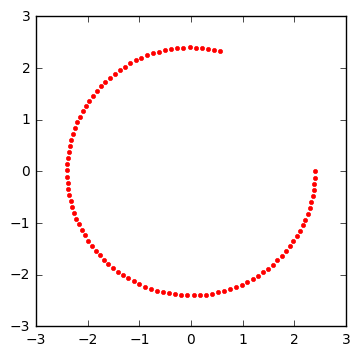

In [2]:
%matplotlib inline
import scipy as sc
import numpy as np

import scipy.linalg as la
import matplotlib.pyplot as plt

A = np.mat('[0,1;-1,0]')

dt = 0.05
T = 100

z = np.mat(np.zeros((2,T)))
H = la.expm(dt*A)

z[:,0] = np.mat('[2.4;0]')
for i in range(1,T):
    z[:,i] = H*z[:,i-1]

    
plt.plot(z[0,:], z[1,:],'.-r')
ax = plt.gcf().gca()
ax.set_aspect('equal')
plt.show()

### Euler's method

Position Evolution
\begin{eqnarray}
\frac{x_i(t + \epsilon) - x_i(t)}{\epsilon} & = & \frac{d x_i}{d t}(t) = \frac{\partial K}{\partial p_i}(p_i(t))  \\
x_i(t + \epsilon)  & = & x_i(t) + \epsilon \frac{\partial K}{\partial p_i}(p_i(t)) 
\end{eqnarray}

Momentum Evolution
\begin{eqnarray}
\frac{p_i(t + \epsilon) - p_i(t)}{\epsilon} & = & \frac{d p_i}{d t}(t) = - \frac{\partial U}{\partial x_i}(x_i(t))  \\
p_i(t + \epsilon) & = & p_i(t) - \epsilon \frac{\partial U}{\partial x_i}(x_i(t))  \\
\end{eqnarray}

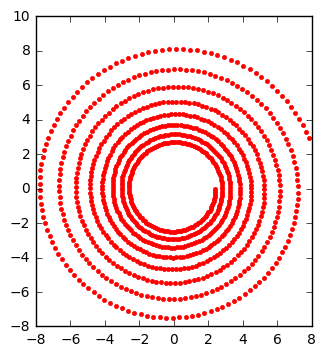

In [3]:
epsilon = 0.05
T = 1000
z_euler = np.mat(np.zeros((2,T)))

def dHdx(x):
    return x

def dHdp(p):
    return p

z_euler[:,0] = np.mat('[2.4;0]')
for i in range(1,T):
    #z_euler[:,i] = z_euler[:,i-1] + epsilon*dH(z_euler[:,i-1])
    
    z_euler[0,i] = z_euler[0,i-1] + epsilon*dHdp(z_euler[1,i-1])
    z_euler[1,i] = z_euler[1,i-1] - epsilon*dHdx(z_euler[0,i-1])

    
plt.plot(z_euler[0,:], z_euler[1,:],'.-r')
ax = plt.gcf().gca()
ax.set_aspect('equal')
plt.show()

### Modified Euler

Use the intermediate solution immediately



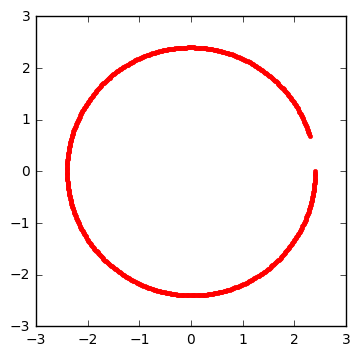

In [4]:
epsilon = 0.01
T = 600
z_euler2 = np.mat(np.zeros((2,T)))

def dHdx(x):
    return x

def dHdp(p):
    return p

z_euler2[:,0] = np.mat('[2.4;0]')
for i in range(1,T):    
    z_euler2[0,i] = z_euler2[0,i-1] + epsilon*dHdp(z_euler2[1,i-1])
    z_euler2[1,i] = z_euler2[1,i-1] - epsilon*dHdx(z_euler2[0,i])

    
plt.plot(z_euler2[0,:], z_euler2[1,:],'.-r')
ax = plt.gcf().gca()
ax.set_aspect('equal')
plt.show()

### The Leapfrog Method

Approximate the momentum at the middle of the time interval.

\begin{eqnarray}
\frac{p_i(t + \epsilon/2) - p_i(t)}{\epsilon/2} & = & \frac{d p_i}{d t}(t) = - \frac{\partial U}{\partial x_i}(x_i(t)) \\
p_i(t + \epsilon/2) & = & p_i(t) - (\epsilon/2) \frac{\partial U}{\partial x_i}(x_i(t)) 
\end{eqnarray}

Use the half-way momentum to approximate the position
\begin{eqnarray}
\frac{x_i(t + \epsilon) - x_i(t)}{\epsilon} & = & \frac{d x_i}{d t}(t + \epsilon/2) = \frac{\partial K}{\partial p_i}(p_i(t+\epsilon/2))  \\
x_i(t + \epsilon) &=& x_i(t) + \epsilon \frac{\partial K}{\partial p_i}(p_i(t+\epsilon/2))
\end{eqnarray}

Update the momentum at time $t+\epsilon$
\begin{eqnarray}
\frac{p_i(t + \epsilon) - p_i(t + \epsilon/2)}{\epsilon/2} & = & \frac{d p_i}{d t}(t+\epsilon) = - \frac{\partial U}{\partial x_i}(x_i(t + \epsilon)) \\
p_i(t + \epsilon) & = & p_i(t+\epsilon/2) - (\epsilon/2) \frac{\partial U}{\partial x_i}(x_i(t+\epsilon)) 
\end{eqnarray}




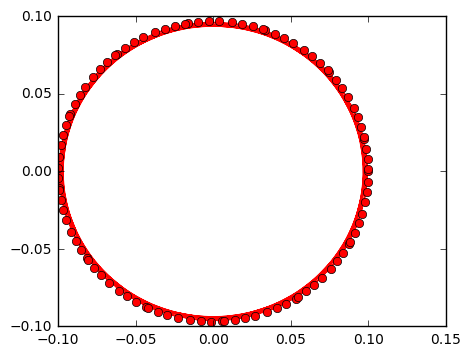

In [5]:
epsilon = 0.5
T = 50

def dHdx(x):
    return x

def dHdp(p):
    return p


#def dHdx(x):
#    A = np.mat('[1;-1]')
#    b = np.mat('[1;3]')
#    u = (b - A*x)
#    if np.all(u > 0):
#        g = A.T*(1/u)
#    else:
#        g = np.inf*u
#    return g[0,0]

T = 100
z_lf = np.mat(np.zeros((2,T)))

z_lf[:,0] = np.mat('[0.1;0]')
for i in range(1,T):
    p_mid = z_lf[1,i-1] - (epsilon/2)*dHdx(z_lf[0,i-1])
    z_lf[0,i] = z_lf[0,i-1] + epsilon*dHdp(p_mid)
    z_lf[1,i] = p_mid - (epsilon/2)*dHdx(z_lf[0,i])

    
plt.plot(z_lf[0,:].T, z_lf[1,:].T,'or-')
ax = plt.gcf().gca()
ax.set_aspect('equal')
plt.show()